### Brief
The coronavirus has taken the world by surprise, changing the usual order of things. In their free time, city residents no longer go out, do not visit cafes and shopping centers. But there is more time for books. Startupers noticed this and rushed to create applications for those who like to read.

Your company decided to be on the wave and bought a large service for reading books by subscription. Your first task as an analyst is to analyze the database. It contains information about books, publishers, authors, as well as user reviews of books. This data will help formulate a value proposition for a new product.

Bottom line - formulate the value proposition of the purchased product based on the data

### Description of data

**Table `books`**

Contains information about books:

- `book_id` — book identifier;
- `author_id` — author identifier;
- `title` — title of the book;
- `num_pages` - number of pages;
- `publication_date` - publication date of the book;
- `publisher_id` - publisher identifier.

**Table `authors`**

Contains information about the authors:

- `author_id` — author identifier;
- `author` is the name of the author.

**Table `publishers`**

Contains information about publishers:

- `publisher_id` — publisher identifier;
- `publisher` — publisher name;

**Table `ratings`**

Contains data about user ratings of books:

- `rating_id` — rating identifier;
- `book_id` — book identifier;
- `username` - the name of the user who left the rating;
- `rating` - rating of the book.

**Table `reviews`**

Contains data about user reviews of books:

- `review_id` — review identifier;
- `book_id` — book identifier;
- `username` - the name of the user who wrote the review;
- `text` — review text.

### Data schema

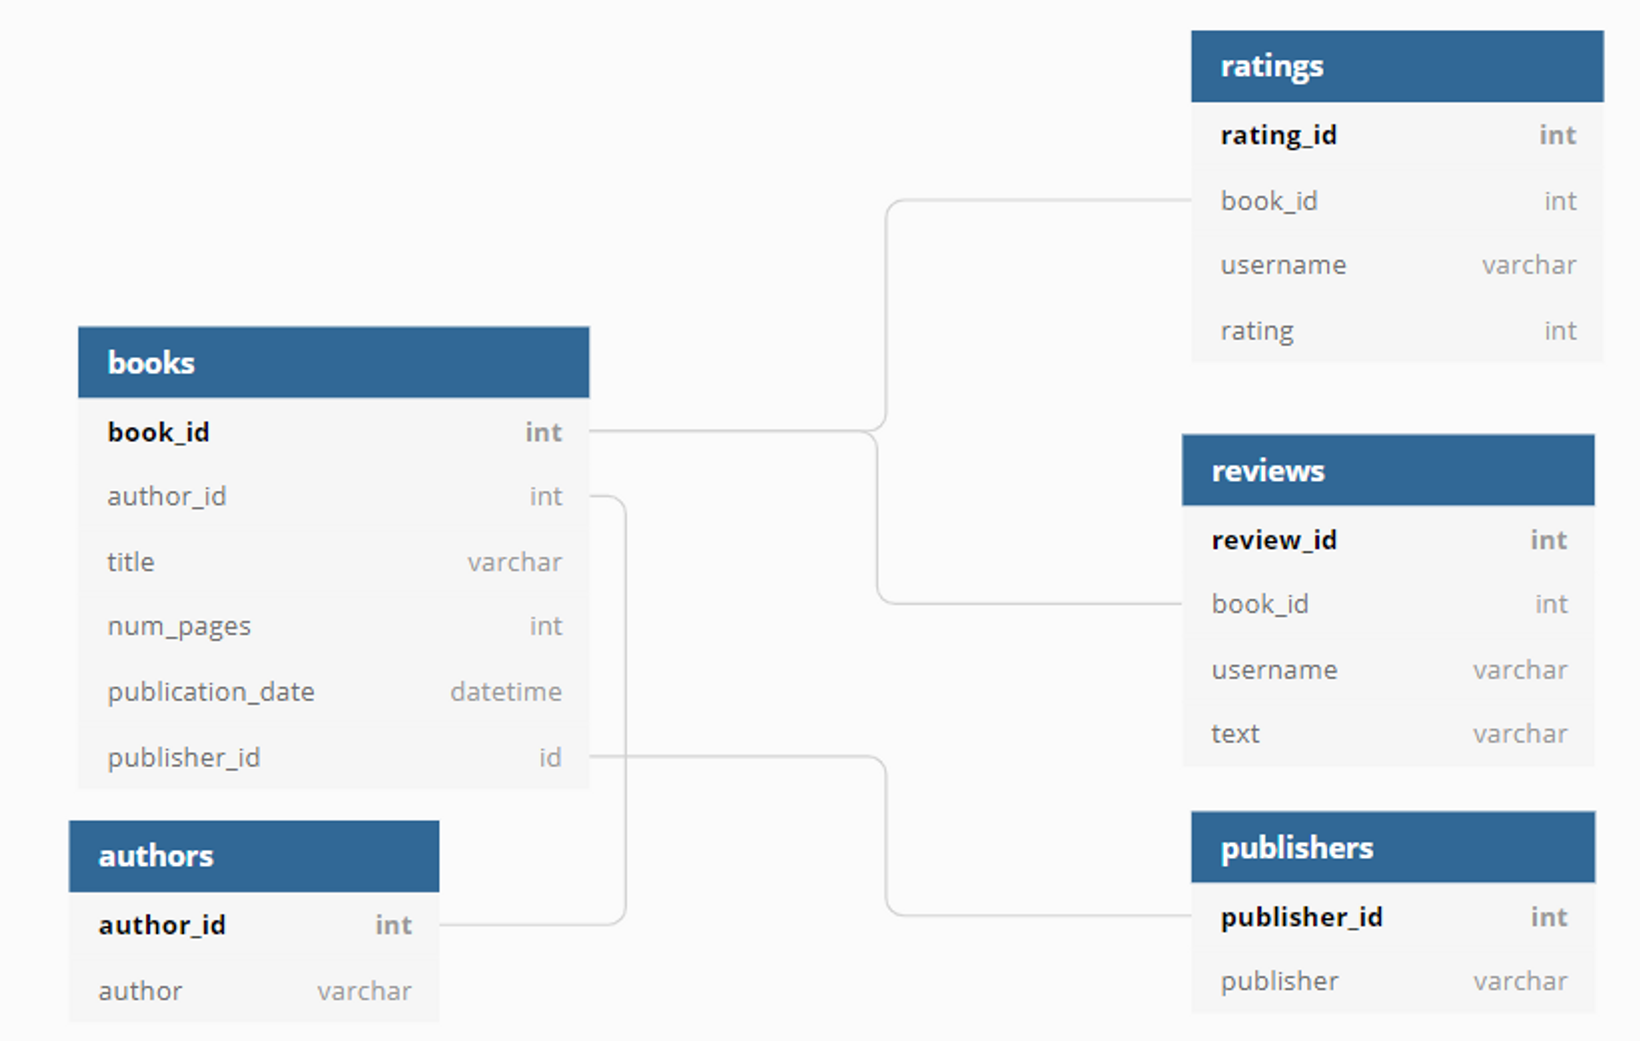

### Tasks

- Count how many books have been published since January 1, 2000;
- For each book, count the number of reviews and the average rating;
- Determine the publishing house that has released the largest number of books thicker than 50 pages - so you exclude brochures from the analysis;
- Identify the author with the highest average book rating - consider only books with 50 or more ratings;
- Calculate the average number of reviews from users who have given more than 50 ratings.

### Examining tables

In [1]:
import pandas as pd
from sqlalchemy import text, create_engine

In [2]:
# set parameters
db_config = {'user': 'praktikum_student', # username
'pwd': 'Sdf4$2;d-d30pp', # password
'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
'port': 6432, # connection port
'db': 'data-analyst-final-project-db'} # database name
connection_string = 'postgresql://{user}:{pwd}@{host}:{port}/{db}'.format(**db_config)

# save the connector
engine = create_engine(connection_string, connect_args={'sslmode':'require'})

# to execute a SQL query, use Pandas
query = '''SELECT * FROM books LIMIT 5'''

display(pd.io.sql.read_sql(sql=text(query), con = engine))

# to execute a SQL query, use Pandas
query = '''SELECT * FROM authors LIMIT 5'''

display(pd.io.sql.read_sql(sql=text(query), con = engine))

# to execute a SQL query, use Pandas
query = '''SELECT * FROM publishers LIMIT 5'''

display(pd.io.sql.read_sql(sql=text(query), con = engine))

# to execute a SQL query, use Pandas
query = '''SELECT * FROM ratings LIMIT 5'''

display(pd.io.sql.read_sql(sql=text(query), con = engine))

# to execute a SQL query, use Pandas
query = '''SELECT * FROM reviews LIMIT 5'''

display(pd.io.sql.read_sql(sql=text(query), con = engine))

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


#### Count how many books have been published since January 1, 2000

In [3]:
query = '''
SELECT COUNT(book_id)
FROM books
WHERE CAST(publication_date AS date) > '2000-01-01'
'''

answer = pd.io.sql.read_sql(sql=text(query), con = engine)
print(answer['count'][0], "books published after Jan 1, 2000")

819 books published after Jan 1, 2000


#### For each book, count the number of reviews and the average rating

In [4]:
# to execute a SQL query, use Pandas
query = '''
WITH A AS (
SELECT book_id,
         COUNT(rating_id) AS reviews_number,
        ROUND(AVG(rating), 2) AS average_rating
FROM ratings
GROUP BY book_id
)
SELECT title, reviews_number, average_rating
FROM books
LEFT JOIN A ON books.book_id = A.book_id
ORDER BY average_rating DESC

'''

answer = pd.io.sql.read_sql(sql=text(query), con = engine)
display(answer)

,title,reviews_number,average_rating
0,Pop Goes the Weasel (Alex Cross #5),2,5.00
1,The Ghost Map: The Story of London's Most Terr...,2,5.00
2,In the Hand of the Goddess (Song of the Liones...,3,5.00
3,Tai-Pan (Asian Saga #2),2,5.00
4,How to Be a Domestic Goddess: Baking and the A...,2,5.00
...,...,...,...
995,The World Is Flat: A Brief History of the Twen...,4,2.25
996,Junky,2,2.00
997,His Excellency: George Washington,2,2.00
998,Drowning Ruth,3,2.00


#### Determine the publishing house that produced the largest number of books thicker than 50 pages - this way you exclude brochures from the analysis;

In [5]:
query = '''
select publisher,
         COUNT(books.book_id)
FROM books
LEFT JOIN publishers ON books.publisher_id = publishers.publisher_id
WHERE num_pages > 50
GROUP BY publisher
ORDER BY COUNT(books.book_id) DESC
LIMIT 1
'''

answer = pd.io.sql.read_sql(sql=text(query), con = engine)
print(answer['publisher'][0], "is the publisher with the most books over 50 pages")

Penguin Books is the publisher with the most books over 50 pages


#### Identify the author with the highest average book rating - consider only books with 50 or more ratings;

In [6]:
query = '''
WITH A AS (
SELECT book_id,
        AVG(rating) AS average_rating,
        COUNT(rating_id) AS reviews_number
FROM ratings
GROUP BY book_id
)

SELECT author,
         AVG(average_rating)
FROM books
LEFT JOIN authors ON books.author_id = authors.author_id
LEFT JOIN A ON books.book_id = A.book_id
WHERE reviews_number >= 50
GROUP BY author
ORDER BY AVG(average_rating) DESC


'''

answer = pd.io.sql.read_sql(sql=text(query), con = engine)
print(answer['author'][0], "is the author with the highest average book rating")

J.K. Rowling/Mary GrandPré is the author with the highest average book rating


#### Calculate the average number of reviews from users who have given more than 50 ratings.

In [7]:
query = '''
WITH user_rating_count AS (
SELECT username
FROM ratings
GROUP BY username
HAVING COUNT(username) > 50
)
SELECT AVG(count)
FROM(
SELECT (COUNT(review_id))
FROM reviews
RIGHT JOIN user_rating_count ON reviews.username = user_rating_count.username
GROUP BY reviews.username
) as ABC
'''

answer = pd.io.sql.read_sql(sql=text(query), con = engine)
print(answer['avg'][0], "- average number of reviews from users who have given more than 50 ratings")

24.333333333333332 - average number of reviews from users who have given more than 50 ratings
